# Visualize the best RFE conformations using cMDS plots

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../..')
from helper_modules.run_or_load import *
from helper_modules.MDS import *

### Load protein related data

In [3]:
prot_name = 'hsp90'

In [4]:
DIR = '../1_Download_and_prepare_protein_ensembles'
path_to_file = f'{DIR}/TABLA_MTDATA_HSP90_298_crys_LIGS_INFO.json'
df_prot = pd.read_json(path_to_file)


### Load the dimensionality reduction results

In [5]:
df_dims = pd.read_pickle('../3_Protein_Ensembles_Analysis/df_PROTEINS_DIMS_reduced_TABLE.obj')

# Update the df with the mds axis
# Pocket shape
df_prot['vol_x'] = df_dims['mds_vol_pkt_x']
df_prot['vol_y'] = df_dims['mds_vol_pkt_y']
# secondary structure residues RMSD
df_prot['secres_x'] = df_dims['mds_sec_x']
df_prot['secres_y'] = df_dims['mds_sec_y']
# pocket residues RMSD
df_prot['pkt_x'] = df_dims['mds_pkt_x']
df_prot['pkt_y'] = df_dims['mds_pkt_y']

### Load POVME3 results and single-conformation docking performances (AUC-ROC)

In [6]:
# Extra features to get volume or surface area
df_extra = pd.read_pickle(f'../4_Ensemble_docking_results/TABLE_Confs_Features_and_performances_hsp90.pkl')

# Adding to the main df
df_prot['volume'] = df_extra['Pk. Volume']
df_prot['surf_area'] = df_extra['Pk. SASA']

# ROC-AUC single performance
df_prot['AUC-ROC'] = df_extra['AUC-ROC']

# Dataframe with all conformations
print('Original Dataframe shape:', df_prot.shape)

# ********* Only for EGFR and HSP90 *********
# Keep only the randomly chosen conformations
np.random.seed(42) # Use the seed for reproducibility
pdb_ids_selected = np.sort(np.random.choice(df_prot.index, 64, replace = False))
df_prot = df_prot.loc[pdb_ids_selected]
print('Final Dataframe shape:', df_prot.shape)

Original Dataframe shape: (298, 23)
Final Dataframe shape: (64, 23)


### Load *Recursive Feature Elimination* results

In [7]:
# Open RFE_estimator
# Open RFE_estimator
dataset    = 'MERGED'
model_name = 'XGB_tree'
split      = 'random'
filename   = f'./cachedir/rfe_selectors/RFE_xgb_{prot_name}.joblib'
# Load the RFE selector (computed in the previos notebook)
rfe_selector = joblib.load(filename)
# Create a dataframe with the protein rankings
df_ranks     = pd.DataFrame({
                     'pdb_id'     : df_prot.index, 
                     'rfe_ranking': rfe_selector.ranking_
               })
df_ranks     = df_ranks.sort_values('rfe_ranking').set_index('pdb_id')

# # Update the df with the rank values
df_prot = df_prot.merge(df_ranks, left_index=True, right_index=True)\
            .sort_values('rfe_ranking')

df_prot

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,...,vol_x,vol_y,secres_x,secres_y,pkt_x,pkt_y,volume,surf_area,AUC-ROC,rfe_ranking
4o07,identification of novel hsp90 alpha / beta iso...,2014-04-09,1,A,1.86,1.000,28.415,2,"[15, 509]","[[1, 15], [224, 732]]",...,-0.072803,-0.059938,-0.339678,-0.346435,0.121081,-0.650738,1920.0,966.0,0.60502,1
4awp,discovery of xl888: a novel tropane-derived sm...,2012-08-29,1,A,1.82,0.986,27.869,3,"[16, 3, 509]","[[1, 16], [124, 126], [224, 732]]",...,0.077343,-0.115122,0.257685,-0.373809,0.601981,0.264461,1797.0,1047.0,0.39150,2
3owb,n-aryl-benzimidazolones as novel small molecul...,2011-09-21,1,A,2.05,1.000,28.279,2,"[16, 509]","[[1, 16], [224, 732]]",...,0.208208,-0.032696,0.780613,-0.058943,0.985344,0.615097,1898.0,898.0,0.57538,3
1uyc,structure-activity relationships in purine-bas...,2004-07-01,1,A,2.00,1.000,28.415,2,"[15, 509]","[[1, 15], [224, 732]]",...,-0.146098,-0.056217,-0.307491,-0.408597,0.120242,-0.661997,1851.0,936.0,0.55563,4
2xjx,"discovery of (2,4-dihydroxy-5-isopropylphenyl)...",2010-08-11,1,A,1.66,1.000,29.098,2,"[10, 509]","[[1, 10], [224, 732]]",...,0.128213,-0.052138,-0.256855,0.794128,-1.319603,0.547467,2265.0,821.0,0.62755,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6gr5,probing the role of arg97 in heat shock protei...,2018-10-03,1,A,1.34,1.000,29.098,2,"[10, 509]","[[1, 10], [224, 732]]",...,0.048172,0.094948,-0.259493,0.702754,-1.228543,0.434611,2103.0,854.0,0.56244,60
3b25,lead generation of heat shock protein 90 inhib...,2011-09-14,1,A,1.75,1.000,28.415,2,"[15, 509]","[[1, 15], [224, 732]]",...,-0.215355,-0.008667,-0.285331,-0.370397,0.141573,-0.641918,1762.0,927.0,0.61223,61
1uy9,structure-activity relationships in purine-bas...,2004-07-01,1,A,2.00,1.000,28.415,2,"[15, 509]","[[1, 15], [224, 732]]",...,-0.170190,-0.025059,-0.322497,-0.363019,0.103142,-0.643798,1887.0,954.0,0.59005,62
3o0i,paralog-selective hsp90 inhibitors define tumo...,2011-10-05,1,A,1.47,1.000,28.415,2,"[15, 509]","[[1, 15], [224, 732]]",...,-0.071151,-0.095991,-0.264594,-0.319705,0.087760,-0.556786,1923.0,934.0,0.59798,63


## cMDS plots
We will use `ggplot2` for plotting

In [8]:
%load_ext rpy2.ipython

Just a few modifications for visualization purposes.

In [9]:
# To be able to plot confs with no inhibitors => NA == 10
df_prot['Inhib_mass_num'] = pd.to_numeric(df_prot['Inhib_mass']).\
                        fillna(10) ** 2
df_prot['volume.T'] = (df_prot['volume']/100) ** 1.5

df_selected = df_prot.sort_values('rfe_ranking').head(16)
x = 'vol_x'
y = 'vol_y'
size='volume.T'

#### Create the dataframe for plotting

In [10]:
# This is the final table for plotting
df_volpk = df_prot[['rfe_ranking', 'vol_x', 'vol_y', 'volume']]
df_volpk = df_volpk.rename({'vol_x': 'x', 'vol_y': 'y'}, axis = 1)
df_volpk

,rfe_ranking,x,y,volume
4o07,1,-0.072803,-0.059938,1920.0
4awp,2,0.077343,-0.115122,1797.0
3owb,3,0.208208,-0.032696,1898.0
1uyc,4,-0.146098,-0.056217,1851.0
2xjx,5,0.128213,-0.052138,2265.0
...,...,...,...,...
6gr5,60,0.048172,0.094948,2103.0
3b25,61,-0.215355,-0.008667,1762.0
1uy9,62,-0.170190,-0.025059,1887.0
3o0i,63,-0.071151,-0.095991,1923.0


R[write to console]: Want to understand how all the pieces fit together? Read R for Data
Science: https://r4ds.had.co.nz/

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



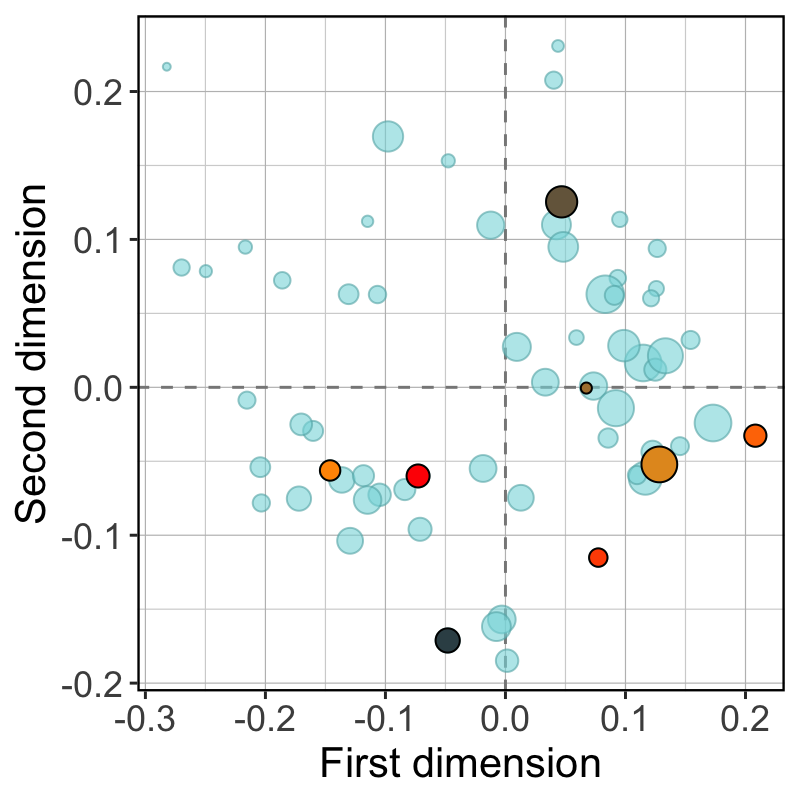

In [11]:
%%R -i df_volpk -i prot_name -w 4. -h 4. --units in -r 200

source('../../R_scripts/plot_cMDS.R')
prot_name <- prot_name

p <- plot_cMDS(df_volpk)

# Save the picture
space <- 'povme'
methodology <- 'MDS_plots/'
save_path = '~/Documents/Doctorado/Paper_doctorado/Response_to_reviewers/Figuras_mayor_review/raw_imgs/'
filename <- paste0(save_path, methodology,
                   paste(prot_name, space, 'MDS.pdf', sep='_'))
ggsave(filename, plot=p, width=4., height= 4.) 
print(p)

## Swarplot with the AUC-ROC values per conformation
- The following plot show the distribution of the protein conformations regarding its AUC-ROC value computed from their individual docking results.

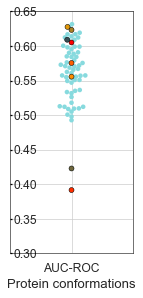

In [12]:
import matplotlib
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

top_confs = 8

# Define the colormap
cmap = LinearSegmentedColormap.from_list(
    name ='test', 
    colors = ["red", "orange", "#374E55"],
    N = top_confs
)
matplotlib.cm.register_cmap("mycolormap", cmap)
sns.set(font_scale = 1.1, style = 'whitegrid')

# Filter the 
df_ = df_prot.copy()
# Get the top 16
df_['top_mask'] = [2 if i <= top_confs else 
                   1 for i in df_['rfe_ranking']]
df_ = df_[['AUC-ROC', 'top_mask', 'rfe_ranking']]\
                    .melt(id_vars=('top_mask', 
                                   'rfe_ranking'))

fig, ax = plt.subplots(figsize=(2.2, 4.45))
# Blue dots (all conformations)
np.random.seed(2)
sns.swarmplot(y = 'value', 
              x = 'variable', 
              data = df_, 
              size = 4.6,
              ax = ax,
              color = '#87DADE')
# Plot the top RFE 16 conformations
df_top = df_.query('top_mask == 2') 
np.random.seed(2)
sns.swarmplot(y = 'value', 
              x = 'variable', 
              data = df_top, 
              size = 5,
              ax  = ax,
              hue ='rfe_ranking',
              edgecolor = 'black', 
              linewidth = 0.5,
              palette = 'mycolormap')
# Axis and labels
ax.set_yticks(np.arange(0.3, 0.70, .05))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.tick_left()
ax.get_legend().remove()
ax.tick_params(length = 2, color = 'black', axis = 'y')
ax.grid(True, linewidth = 0.7)
ax.tick_params(axis="y",direction="in", pad=-27)
ax.set(xlabel = 'Protein conformations', ylabel = '')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.55)
    ax.spines[axis].set_edgecolor('black')
plt.savefig(f'{prot_name}_swarm_auc.pdf')

# Save the picture
plt.show()

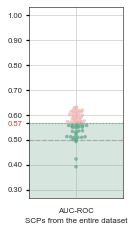

In [21]:
top_confs = 8

# Define the colormap
cmap = LinearSegmentedColormap.from_list(
    name ='test', 
    colors = ["red", "orange", "#374E55"],
    N = top_confs
)
matplotlib.cm.register_cmap("mycolormap", cmap)
sns.set(font_scale = 0.7, style = 'whitegrid')

# Filter the 
df_ = df_prot.copy()
# Get the top 16
df_['top_mask'] = [2 if i <= top_confs else 
                   1 for i in df_['rfe_ranking']]
df_ = df_[['AUC-ROC', 'top_mask', 'rfe_ranking']]\
                    .melt(id_vars=('top_mask', 
                                   'rfe_ranking'))
# Get the AUC-ROC of the 32 lowest conformation
auc_worst_32 = df_['value'].nsmallest(32).max()
df_['worst_32'] = df_['value'] <= auc_worst_32

fig, ax = plt.subplots(figsize=(1.7, 3.52))
# Blue dots (all conformations)
np.random.seed(2)
sns.swarmplot(y = 'value', 
              x = 'variable', 
              data = df_, 
              size = 3.6,
              ax = ax,
              alpha = 0.7,
              hue = 'worst_32',
              palette = ['#F0B3B2', '#5CA586'])
# Axis and labels
ax.set_yticks(list(np.arange(0.3, 1.1, .1)) + [auc_worst_32])
ax.get_yticklabels()[-1].set_color("#B24745")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.tick_left()
ax.get_legend().remove()
plt.axhline(y=0.5, color='darkgrey', linewidth = 1.2, linestyle = '--')
plt.axhline(y=auc_worst_32, color='#79AF97', 
            linestyle=':', linewidth = 1.2)
ax.fill_between([-1,1], [0], [auc_worst_32], color='#79AF97', alpha = 0.3 )
ax.tick_params(length = 3, color = 'black', axis = 'y')
ax.grid(True, linewidth = 0.7)
# ax.tick_params(axis="y",direction="in", pad=-27)
ax.set_xlabel('SCPs from the entire dataset', fontsize = 8)
ax.set_ylabel('')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.55)
    ax.spines[axis].set_edgecolor('black')
plt.ylim(0.265, 1.033)
plt.savefig(f'{prot_name}_swarm_auc.pdf')
# Save the picture
plt.show()

## MDS using Secondary structure 
- The following projection was computed from the pairwise RMSD matrix of the C$\alpha$ of the residues belonging to the protein's secondary structure.

In [33]:
df_secRMSD = df_prot[['rfe_ranking', 'secres_x', 'secres_y', 'volume']]
df_secRMSD = df_secRMSD.rename({'secres_x': 'x', 'secres_y': 'y'}, axis = 1)

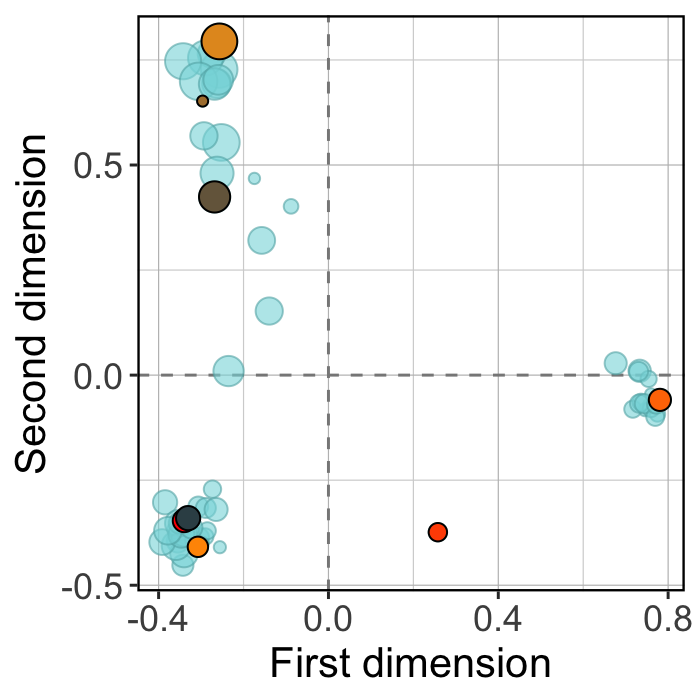

In [34]:
%%R -i df_secRMSD -w 3.5 -h 3.5 --units in -r 200

p <- plot_cMDS(df_secRMSD)

# Save the picture
space <- 'secRMSD'
methodology <- 'MDS_plots/'
save_path = '~/Documents/Doctorado/Paper_doctorado/Response_to_reviewers/Figuras_mayor_review/raw_imgs/'
filename <- paste0(save_path, methodology,
                   paste(prot_name, space, 'MDS.pdf', sep='_'))
ggsave(filename, plot=p, width=4.0, height= 4.0) 
print(p)

## MDS using pocket residues

In [35]:
df_pkRMSD = df_prot[['rfe_ranking', 'pkt_x', 'pkt_y', 'volume']]
df_pkRMSD = df_pkRMSD.rename({'pkt_x': 'x', 'pkt_y': 'y'}, axis = 1)

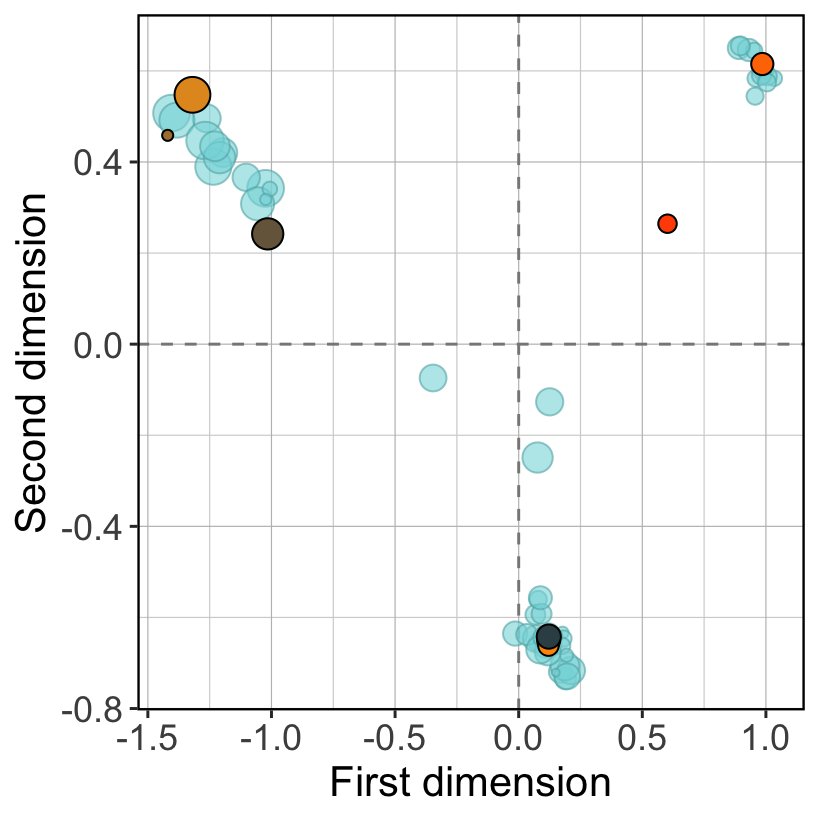

In [36]:
%%R -i df_pkRMSD -w 4.1 -h 4.1 --units in -r 200

p <- plot_cMDS(df_pkRMSD)

# Save the picture
space <- 'pkRMSD'
methodology <- 'MDS_plots/'
save_path = '~/Documents/Doctorado/Paper_doctorado/Response_to_reviewers/Figuras_mayor_review/raw_imgs/'
filename <- paste0(save_path, methodology,
                   paste(prot_name, space, 'MDS.pdf', sep='_'))
ggsave(filename, plot=p, width=4.0, height= 4.0) 
print(p)